In [1]:
from theano.sandbox import cuda
import utils; reload(utils)
from utils import *

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
Using Theano backend.


# VGG

In [2]:
(val_classes, train_classes,
 val_labels, train_labels,
 val_filenames, train_filenames,
 test_filenames) = get_classes('data/fish/')

Found 3277 images belonging to 8 classes.
Found 500 images belonging to 8 classes.
Found 1000 images belonging to 1 classes.


In [3]:
print(val_classes)
print(train_classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 

In [4]:
print(val_labels)
print(train_labels)

[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  1.]]
[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  1.]]


In [5]:
print(val_filenames)
print(train_filenames)
print(test_filenames)

['ALB/img_04018.jpg', 'ALB/img_05893.jpg', 'ALB/img_00984.jpg', 'ALB/img_07912.jpg', 'ALB/img_03237.jpg', 'ALB/img_07394.jpg', 'ALB/img_03570.jpg', 'ALB/img_02593.jpg', 'ALB/img_07542.jpg', 'ALB/img_04527.jpg', 'ALB/img_06735.jpg', 'ALB/img_04090.jpg', 'ALB/img_02710.jpg', 'ALB/img_03107.jpg', 'ALB/img_06591.jpg', 'ALB/img_07640.jpg', 'ALB/img_01858.jpg', 'ALB/img_06668.jpg', 'ALB/img_03820.jpg', 'ALB/img_01110.jpg', 'ALB/img_05283.jpg', 'ALB/img_05093.jpg', 'ALB/img_04841.jpg', 'ALB/img_01570.jpg', 'ALB/img_06633.jpg', 'ALB/img_01584.jpg', 'ALB/img_03797.jpg', 'ALB/img_03431.jpg', 'ALB/img_02032.jpg', 'ALB/img_06396.jpg', 'ALB/img_06286.jpg', 'ALB/img_07016.jpg', 'ALB/img_04713.jpg', 'ALB/img_04821.jpg', 'ALB/img_03092.jpg', 'ALB/img_05101.jpg', 'ALB/img_01422.jpg', 'ALB/img_01023.jpg', 'ALB/img_02263.jpg', 'ALB/img_02933.jpg', 'ALB/img_05810.jpg', 'ALB/img_07567.jpg', 'ALB/img_06887.jpg', 'ALB/img_03589.jpg', 'ALB/img_06386.jpg', 'ALB/img_00319.jpg', 'ALB/img_00636.jpg', 'ALB/img_015

In [6]:
# removing path
remove_path = lambda y: [x.split('/')[-1] for x in y]
raw_train_filenames = remove_path(train_filenames)
raw_val_filenames = remove_path(val_filenames)
raw_test_filenames = remove_path(test_filenames)

In [7]:
train_data = get_data('data/fish/train', (360, 640))
val_data   = get_data('data/fish/valid', (360, 640))
test_data  = get_data('data/fish/test', (360, 640))

Found 3277 images belonging to 8 classes.
Found 500 images belonging to 8 classes.
Found 1000 images belonging to 1 classes.


In [8]:
from vgg16bn import Vgg16BN
model = Vgg16BN((360, 640)).model
model.pop()

In [9]:
model.input_shape

(None, 3, 360, 640)

In [10]:
model.output_shape

(None, 512, 22, 40)

In [11]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 360, 640)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 362, 642)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 360, 640)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 362, 642)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

# Precompute convolutional output

In [13]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
conv_train_features = model.predict(train_data)
conv_test_features  = model.predict(test_data)
conv_val_features   = model.predict(val_data)

# Fully convolutional net (FCN)

Since we're using a larger input, the output of the final convolutional layer is also larger. So, we probably don't want to put a dense layer in there - that would be a lot of parameters! Instead, let's use a fully convolutional net (FCN); this also has the benefit that they tend to generalize well, and also seems like a good fit for our problem (since the fish are a small part of the image)

In [16]:
lrg_model = Sequential([
    BatchNormalization(axis=1, input_shape=model.output_shape[1:]),
    Convolution2D(128, 3, 3, activation='relu', border_mode='same'),
    BatchNormalization(axis=1),
    MaxPooling2D(),
    Convolution2D(128, 3, 3, activation='relu', border_mode='same'),
    BatchNormalization(axis=1),
    MaxPooling2D(),
    Convolution2D(128, 3, 3, activation='relu', border_mode='same'),
    BatchNormalization(axis=1),
    MaxPooling2D((1,2)),
    Convolution2D(8, 3, 3, border_mode='same'),
    Dropout(0.),
    GlobalAveragePooling2D(),
    Activation('softmax')
])

In [17]:
lrg_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
batchnormalization_1 (BatchNorma (None, 512, 22, 40)   2048        batchnormalization_input_1[0][0] 
____________________________________________________________________________________________________
convolution2d_14 (Convolution2D) (None, 128, 22, 40)   589952      batchnormalization_1[0][0]       
____________________________________________________________________________________________________
batchnormalization_2 (BatchNorma (None, 128, 22, 40)   512         convolution2d_14[0][0]           
____________________________________________________________________________________________________
maxpooling2d_6 (MaxPooling2D)    (None, 128, 11, 20)   0           batchnormalization_2[0][0]       
___________________________________________________________________________________________

In [18]:
lrg_model.compile(optimizer=Adam(lr=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [19]:
lrg_model.fit(conv_train_features, train_labels,
            batch_size=64,
            nb_epoch=2,
            validation_data=(conv_val_features, val_labels),
            verbose=2)

Train on 3277 samples, validate on 500 samples
Epoch 1/2
12s - loss: 0.6398 - acc: 0.7995 - val_loss: 1.0175 - val_acc: 0.7160
Epoch 2/2
12s - loss: 0.1045 - acc: 0.9741 - val_loss: 0.3921 - val_acc: 0.8880


In [21]:
lrg_model.optimizer.lr=1e-5

In [23]:
lrg_model.fit(conv_train_features, train_labels,
            batch_size=64,
            nb_epoch=6,
            validation_data=(conv_val_features, val_labels),
            verbose=2)

Train on 3277 samples, validate on 500 samples
Epoch 1/6
12s - loss: 0.0395 - acc: 0.9918 - val_loss: 0.3559 - val_acc: 0.9160
Epoch 2/6
12s - loss: 0.0138 - acc: 0.9973 - val_loss: 0.2941 - val_acc: 0.9300
Epoch 3/6
12s - loss: 0.0075 - acc: 0.9985 - val_loss: 0.2244 - val_acc: 0.9500
Epoch 4/6
12s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.2323 - val_acc: 0.9560
Epoch 5/6
12s - loss: 0.0069 - acc: 0.9988 - val_loss: 0.2560 - val_acc: 0.9440
Epoch 6/6
12s - loss: 0.0045 - acc: 0.9991 - val_loss: 0.2376 - val_acc: 0.9460


# Bounding boxes and Multi-Output

In [29]:
import ujson as json
anno_classes = ['alb', 'bet', 'dol', 'lag', 'other', 'shark', 'yft']
bb_json = {}
for c in anno_classes:
    j = json.load(open('{}annos/{}_labels.json'.format('data/fish/', c), 'r'))
    for l in j:
        if 'annotations' in l.keys() and len(l['annotations'])>0:
            bb_json[l['filename'].split('/')[-1]] = sorted(
                l['annotations'], key=lambda x: x['height']*x['width'])[-1]

In [31]:
bb_json['img_04908.jpg']

{u'class': u'rect',
 u'height': 246.75000000000074,
 u'width': 432.8700000000013,
 u'x': 465.3000000000014,
 u'y': 496.32000000000147}

In [32]:
train_file2idx = {o:i for i,o in enumerate(raw_train_filenames)}
val_file2idx   = {o:i for i,o in enumerate(raw_val_filenames)}

In [33]:
train_file2idx

{'img_04866.jpg': 1909,
 'img_04908.jpg': 3255,
 'img_07566.jpg': 581,
 'img_07687.jpg': 2000,
 'img_00485.jpg': 2297,
 'img_04433.jpg': 221,
 'img_03905.jpg': 1408,
 'img_05153.jpg': 295,
 'img_05166.jpg': 2992,
 'img_02785.jpg': 2870,
 'img_03525.jpg': 2531,
 'img_04941.jpg': 1882,
 'img_00041.jpg': 1099,
 'img_07102.jpg': 1816,
 'img_02856.jpg': 196,
 'img_00970.jpg': 739,
 'img_04179.jpg': 1553,
 'img_00910.jpg': 1869,
 'img_02557.jpg': 2518,
 'img_01186.jpg': 337,
 'img_05057.jpg': 1206,
 'img_02089.jpg': 1745,
 'img_07558.jpg': 243,
 'img_02460.jpg': 2026,
 'img_02169.jpg': 2617,
 'img_04354.jpg': 838,
 'img_01470.jpg': 1736,
 'img_06156.jpg': 2989,
 'img_01342.jpg': 2507,
 'img_07773.jpg': 484,
 'img_00482.jpg': 1450,
 'img_07742.jpg': 3038,
 'img_05510.jpg': 1250,
 'img_04060.jpg': 2216,
 'img_02742.jpg': 1631,
 'img_02721.jpg': 3003,
 'img_04206.jpg': 515,
 'img_02102.jpg': 1977,
 'img_05575.jpg': 227,
 'img_03213.jpg': 608,
 'img_06825.jpg': 1595,
 'img_00370.jpg': 2782,
 'im

In [34]:
# for any images that have no annotations, we'll create an empty bounding box
empty_bbox = {'height': 0., 'width': 0., 'x':0., 'y': 0.}

In [35]:
for x in raw_train_filenames:
    if not x in bb_json.keys(): bb_json[x] = empty_bbox
for x in raw_val_filenames:
    if not x in bb_json.keys(): bb_json[x] = empty_bbox

In [37]:
# convert the coordinates to our resized 224x224 images
def convert_bb(bb, size):
    bb = [bb[p] for p in ['height', 'width', 'x', 'y']]
    conv_x = (224. / size[0])
    conv_y = (224. / size[1])
    bb[0]  = bb[0]*conv_y
    bb[1]  = bb[1]*conv_x
    bb[2] = max(bb[2]*conv_x, 0)
    bb[3] = max(bb[3]*conv_y, 0)
    return bb

In [41]:
raw_train_sizes = [PIL.Image.open('data/fish/train/' + x).size for x in train_filenames]
raw_val_sizes   = [PIL.Image.open('data/fish/valid/' + x).size for x in val_filenames]

In [42]:
train_bbox = np.stack([convert_bb(bb_json[f], s) for f,s in zip(raw_train_filenames, raw_train_sizes)])
val_bbox   = np.stack([convert_bb(bb_json[f], s) for f,s in zip(raw_val_filenames, raw_val_sizes)])

In [48]:
def plot_bb(i):
    bb = val_bbox[i]
    plot(val_data[i])
    plt.gca().add_patch(
        plt.Rectangle((bb[2], bb[3]), bb[1], bb[0], color='red', fill=False, lw=3)
    )

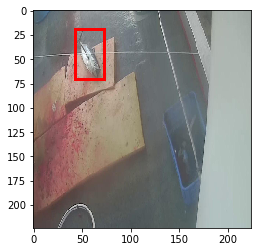

In [50]:
%matplotlib inline
plot_bb(0)

In [51]:
# functional api
inp = Input(conv_layers[-1].output_shape[1:])
x   = MaxPooling2D()(inp)
x   = BatchNormalization(axis=1)(x)
x   = Dropout(0.6/4)(x)
x   = Flatten()(x)
x   = Dense(512, activation='relu')(x)
x   = BatchNormalization()(x)
x   = Dropout(0.6)(x)
x   = Dense(512, activation='relu')(x)
x   = BatchNormalization()(x)
x   = Dropout(0.6/2)(x)
y_bb= Dense(4, name='bb')(x)
y_c = Dense(8, activation='softmax', name='class')(x)

In [53]:
# multi-output
model = Model([inp], [y_bb, y_c])
model.compile(optimizer=Adam(lr=0.001),
             loss=['mse', 'categorical_crossentropy'],
             metrics=['accuracy'],
             loss_weights=[0.001, 1.])

In [55]:
model.fit(conv_train_features,
         [train_bbox, train_labels],
         batch_size=64,
         nb_epoch=3,
         validation_data=(conv_val_features, [val_bbox, val_labels]),
         verbose=2)

Train on 3277 samples, validate on 500 samples
Epoch 1/3
2s - loss: 6.1254 - bb_loss: 5011.8386 - class_loss: 1.1135 - bb_acc: 0.4269 - class_acc: 0.6802 - val_loss: 5.0604 - val_bb_loss: 4126.9438 - val_class_loss: 0.9335 - val_bb_acc: 0.6240 - val_class_acc: 0.8540
Epoch 2/3
2s - loss: 5.0594 - bb_loss: 4715.9312 - class_loss: 0.3435 - bb_acc: 0.5035 - class_acc: 0.8969 - val_loss: 4.2419 - val_bb_loss: 3948.8752 - val_class_loss: 0.2930 - val_bb_acc: 0.6120 - val_class_acc: 0.9280
Epoch 3/3
2s - loss: 4.3860 - bb_loss: 4225.5337 - class_loss: 0.1604 - bb_acc: 0.5407 - class_acc: 0.9551 - val_loss: 3.7398 - val_bb_loss: 3525.3611 - val_class_loss: 0.2144 - val_bb_acc: 0.5980 - val_class_acc: 0.9500


In [56]:
model.optimizer.lr = 1e-5

In [57]:
model.fit(conv_train_features,
         [train_bbox, train_labels],
         batch_size=64,
         nb_epoch=10,
         validation_data=(conv_val_features, [val_bbox, val_labels]),
         verbose=2)

Train on 3277 samples, validate on 500 samples
Epoch 1/10
2s - loss: 3.6836 - bb_loss: 3576.5528 - class_loss: 0.1070 - bb_acc: 0.5713 - class_acc: 0.9744 - val_loss: 3.1965 - val_bb_loss: 3018.1244 - val_class_loss: 0.1784 - val_bb_acc: 0.6200 - val_class_acc: 0.9580
Epoch 2/10
2s - loss: 2.8978 - bb_loss: 2833.9687 - class_loss: 0.0638 - bb_acc: 0.6125 - class_acc: 0.9808 - val_loss: 2.5159 - val_bb_loss: 2326.3000 - val_class_loss: 0.1896 - val_bb_acc: 0.6300 - val_class_acc: 0.9580
Epoch 3/10
2s - loss: 2.0807 - bb_loss: 2021.9270 - class_loss: 0.0587 - bb_acc: 0.6555 - class_acc: 0.9860 - val_loss: 1.7954 - val_bb_loss: 1633.4680 - val_class_loss: 0.1619 - val_bb_acc: 0.6800 - val_class_acc: 0.9640
Epoch 4/10
2s - loss: 1.3105 - bb_loss: 1257.8471 - class_loss: 0.0526 - bb_acc: 0.6820 - class_acc: 0.9847 - val_loss: 1.1698 - val_bb_loss: 1004.9433 - val_class_loss: 0.1649 - val_bb_acc: 0.7400 - val_class_acc: 0.9660
Epoch 5/10
2s - loss: 0.7551 - bb_loss: 714.5281 - class_loss: 0.